In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps

In [16]:
df = pd.read_csv('conversion.csv')
df.columns = df.columns.str.lower()

In [11]:
df.shape

(1143, 11)

In [17]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [10]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [13]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [33]:
df.xyz_campaign_id.nunique()

3

In [59]:
log_impressions = df.groupby('fb_campaign_id', as_index=False).impressions.sum()
log_impressions['log_impressions'] = np.log(log_impressions.impressions)

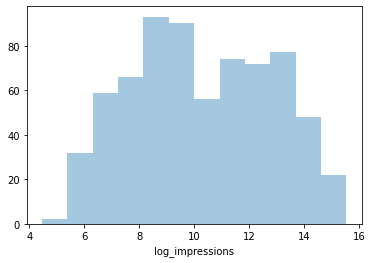

In [64]:
sns.distplot(log_impressions['log_impressions'],kde=False)

In [69]:
df['ctr'] = df.clicks / df.impressions * 100
df.sort_values('ctr',ascending=False).head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,log_impressions,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,6.850126,0.105932
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,7.769379,0.084495
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,8.094684,0.061031
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,8.576782,0.056529
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,7.541152,0.053079


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


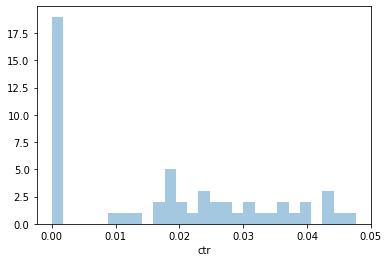

In [81]:
df_916 = df.query('xyz_campaign_id == 916')
sns.distplot(df_916.ctr, bins=27, kde=False)

In [82]:
df['cpc'] = df.spent / df.clicks

In [92]:
round(df.cpc.quantile(q=0.75)-df.cpc.quantile(q=0.25),2)

0.25

In [100]:
round(sps.iqr(df.cpc, nan_policy='omit'),2)

0.25

In [91]:
round(df.cpc.quantile(q=0.75),2)

1.64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


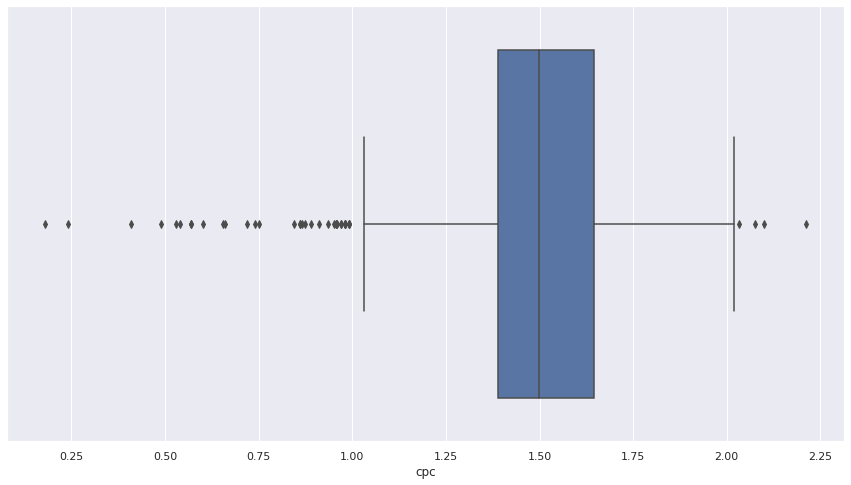

In [99]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(df.cpc.dropna())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


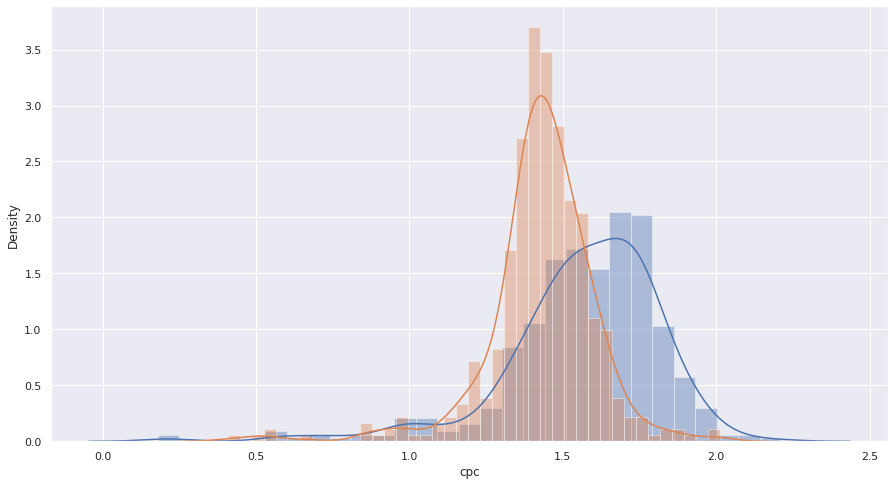

In [107]:
df_916 = df.query('xyz_campaign_id == 916')
sns.distplot(df.query('gender == "M"').cpc)
sns.distplot(df.query('gender == "F"').cpc)

In [112]:
df['cr'] = df.approved_conversion / df.clicks * 100
round(df.query('ad_id == 1121814').cr, 2)

860    3.09
Name: cr, dtype: float64